<a href="https://www.kaggle.com/code/baotrantruong810/multiple-linear-regression-by-python?scriptVersionId=103310031" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# %% Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sms
from test import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# %% Load data
df = pd.read_csv('../input/car-sales/Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
#%% Check data is Null
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [4]:
#%% Fill Null data with interpolate
df = df.interpolate()
print(df)

    Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545               13.760   
153        Volvo      S70              15.245               13.760   
154        Volvo      V70              17.531               13.760   
155        Volvo      C70               3.493               13.760   
156        Volvo      S80              18.969               13.760   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      

In [5]:
#%% Check Null data again
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,18.493105,27.449232,3.063694,186.375796,107.522293,71.170701,187.441720,3.382611,17.945860,23.828025,77.290632
std,68.029422,11.408391,14.273362,1.041889,56.771067,7.629469,3.450553,13.444976,0.628058,3.876185,4.256486,25.082600
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.525000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,14.010000,23.400000,3.000000,180.000000,107.000000,70.600000,188.000000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,19.925000,31.965000,3.500000,215.000000,112.200000,73.500000,196.200000,3.821000,19.500000,26.000000,90.211700
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
#%% Declare variable
price = df[["Price_in_thousands"]].values.reshape(-1,1)
sale = df['Sales_in_thousands'].values.reshape(-1,1)
resale = df['__year_resale_value'].values.reshape(-1,1)
enginesize = df['Engine_size'].values.reshape(-1,1)
horsepower = df['Horsepower'].values.reshape(-1,1)
wheelbase = df['Wheelbase'].values.reshape(-1,1)
width = df['Width'].values.reshape(-1,1)
length = df['Length'].values.reshape(-1,1)
curbweight = df['Curb_weight'].values.reshape(-1,1)
fuelcapacity = df['Fuel_capacity'].values.reshape(-1,1)
fuelefficiency = df['Fuel_efficiency'].values.reshape(-1,1)
power = df['Power_perf_factor'].values.reshape(-1,1)

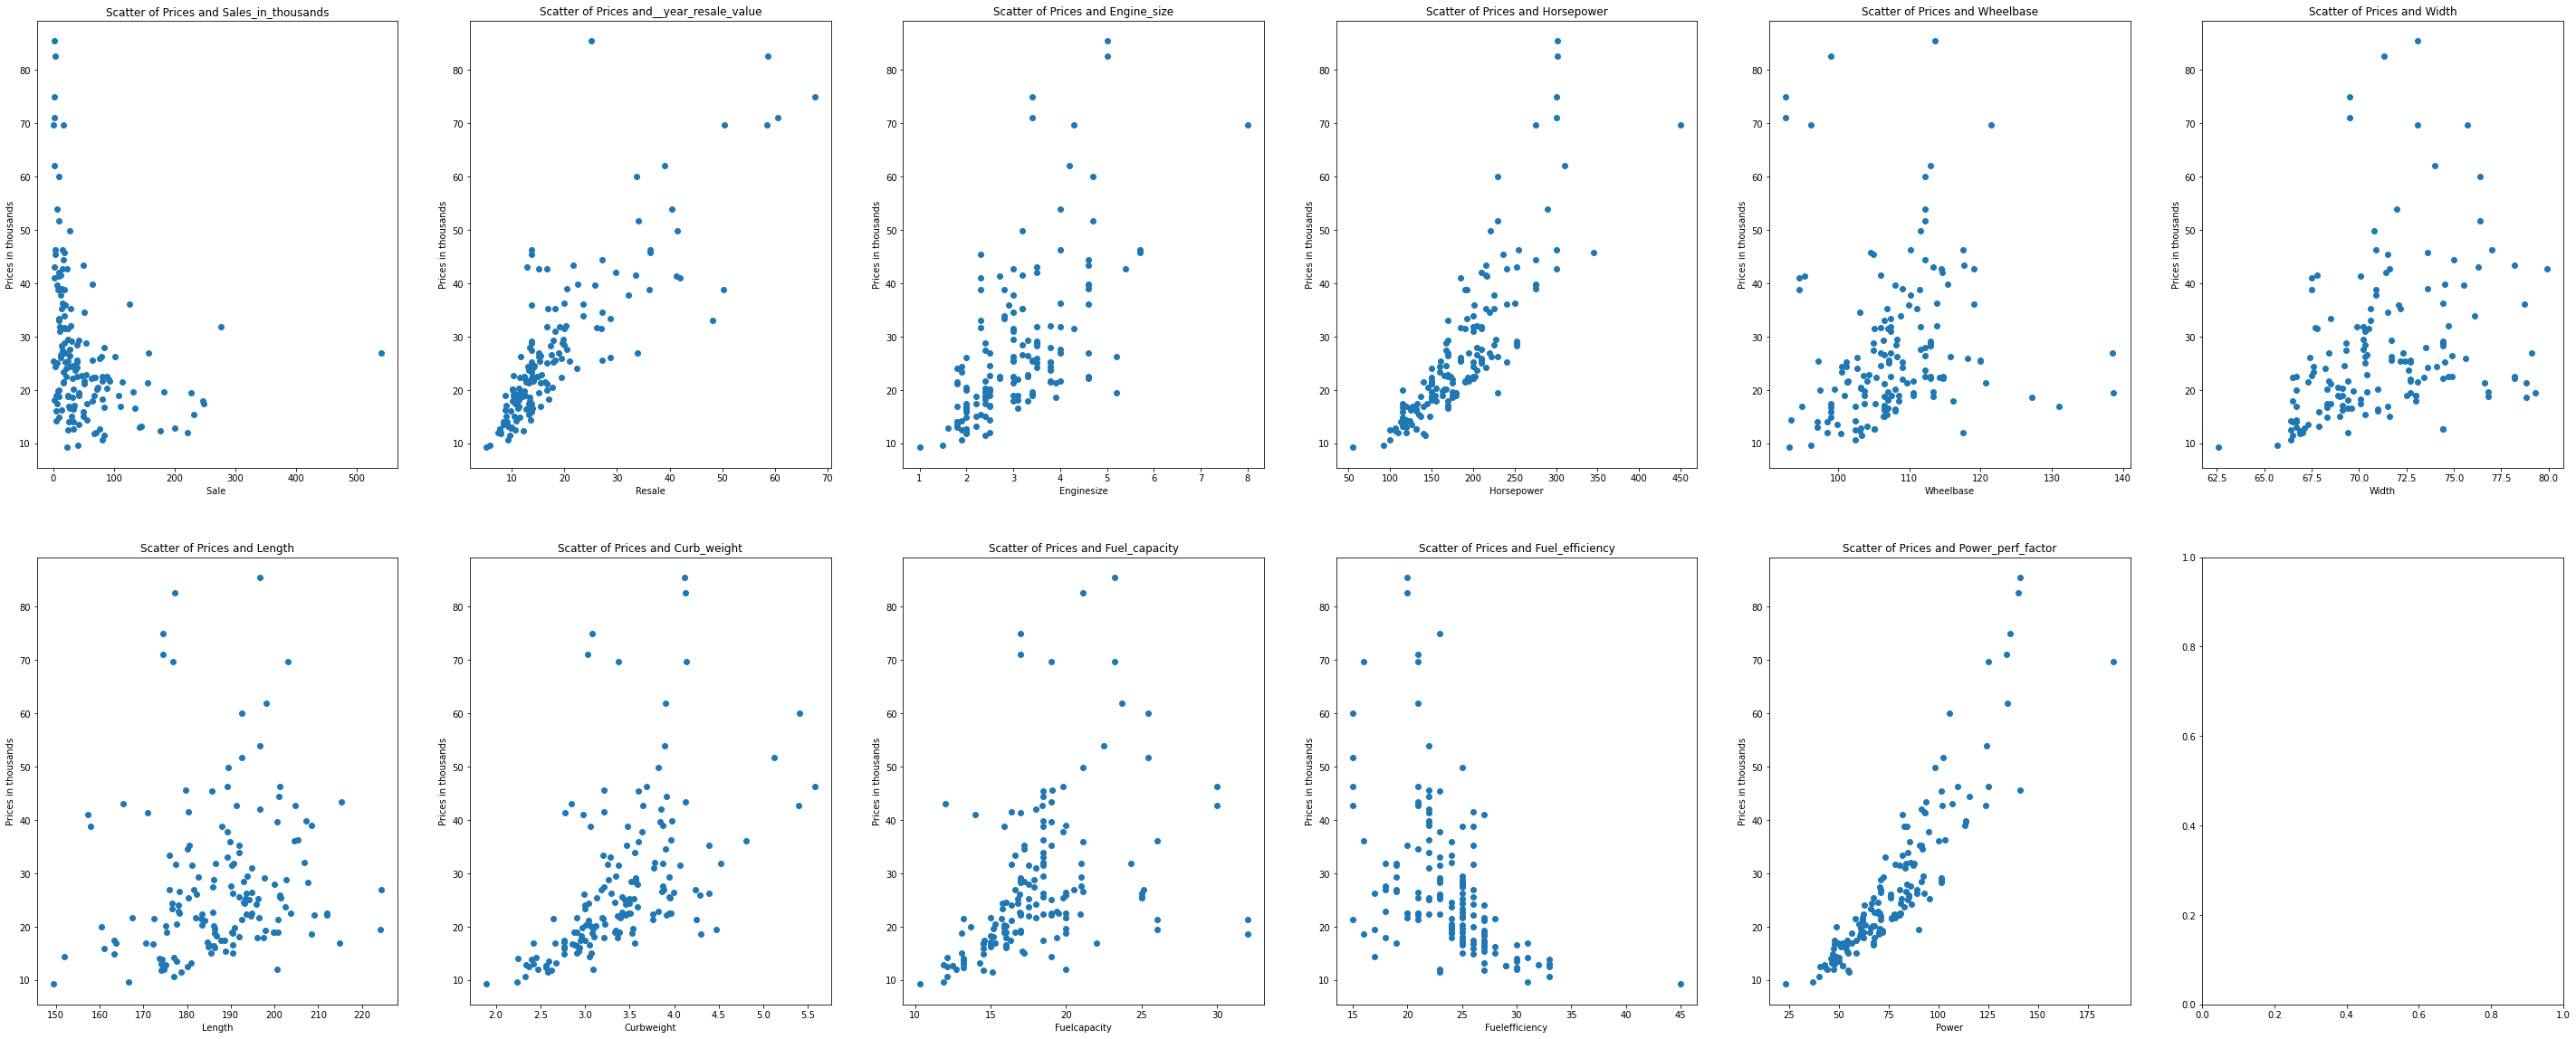

In [8]:
#%% Scatter chart between independent variables and prices
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(ncols = 6, nrows = 2, figsize=(50,20))
ax1.scatter(sale, price)
ax1.set(xlabel = 'Sale ')
ax1.set(ylabel= 'Prices in thousands')
ax1.set(title = 'Scatter of Prices and Sales_in_thousands')

ax2.scatter(resale, price)
ax2.set(xlabel = 'Resale')
ax2.set(ylabel= 'Prices in thousands')
ax2.set(title = 'Scatter of Prices and__year_resale_value')

ax3.scatter(enginesize, price)
ax3.set(xlabel = 'Enginesize')
ax3.set(ylabel= 'Prices in thousands')
ax3.set(title = 'Scatter of Prices and Engine_size')

ax4.scatter(horsepower, price)
ax4.set(xlabel = 'Horsepower')
ax4.set(ylabel= 'Prices in thousands')
ax4.set(title = 'Scatter of Prices and Horsepower')

ax5.scatter(wheelbase, price)
ax5.set(xlabel = 'Wheelbase')
ax5.set(ylabel= 'Prices in thousands')
ax5.set(title = 'Scatter of Prices and Wheelbase')

ax6.scatter(width, price)
ax6.set(xlabel = 'Width')
ax6.set(ylabel= 'Prices in thousands')
ax6.set(title = 'Scatter of Prices and Width')

ax7.scatter(length , price)
ax7.set(xlabel = 'Length')
ax7.set(ylabel= 'Prices in thousands')
ax7.set(title = 'Scatter of Prices and Length')

ax8.scatter(curbweight, price)
ax8.set(xlabel = 'Curbweight')
ax8.set(ylabel='Prices in thousands')
ax8.set(title = 'Scatter of Prices and Curb_weight')

ax9.scatter(fuelcapacity, price)
ax9.set(xlabel = 'Fuelcapacity')
ax9.set(ylabel= 'Prices in thousands')
ax9.set(title = 'Scatter of Prices and Fuel_capacity')

ax10.scatter(fuelefficiency, price)
ax10.set(xlabel = 'Fuelefficiency')
ax10.set(ylabel= 'Prices in thousands')
ax10.set(title = 'Scatter of Prices and Fuel_efficiency')

ax11.scatter(power, price)
ax11.set(xlabel = 'Power')
ax11.set(ylabel= 'Prices in thousands')
ax11.set(title = 'Scatter of Prices and Power_perf_factor')

plt.show()

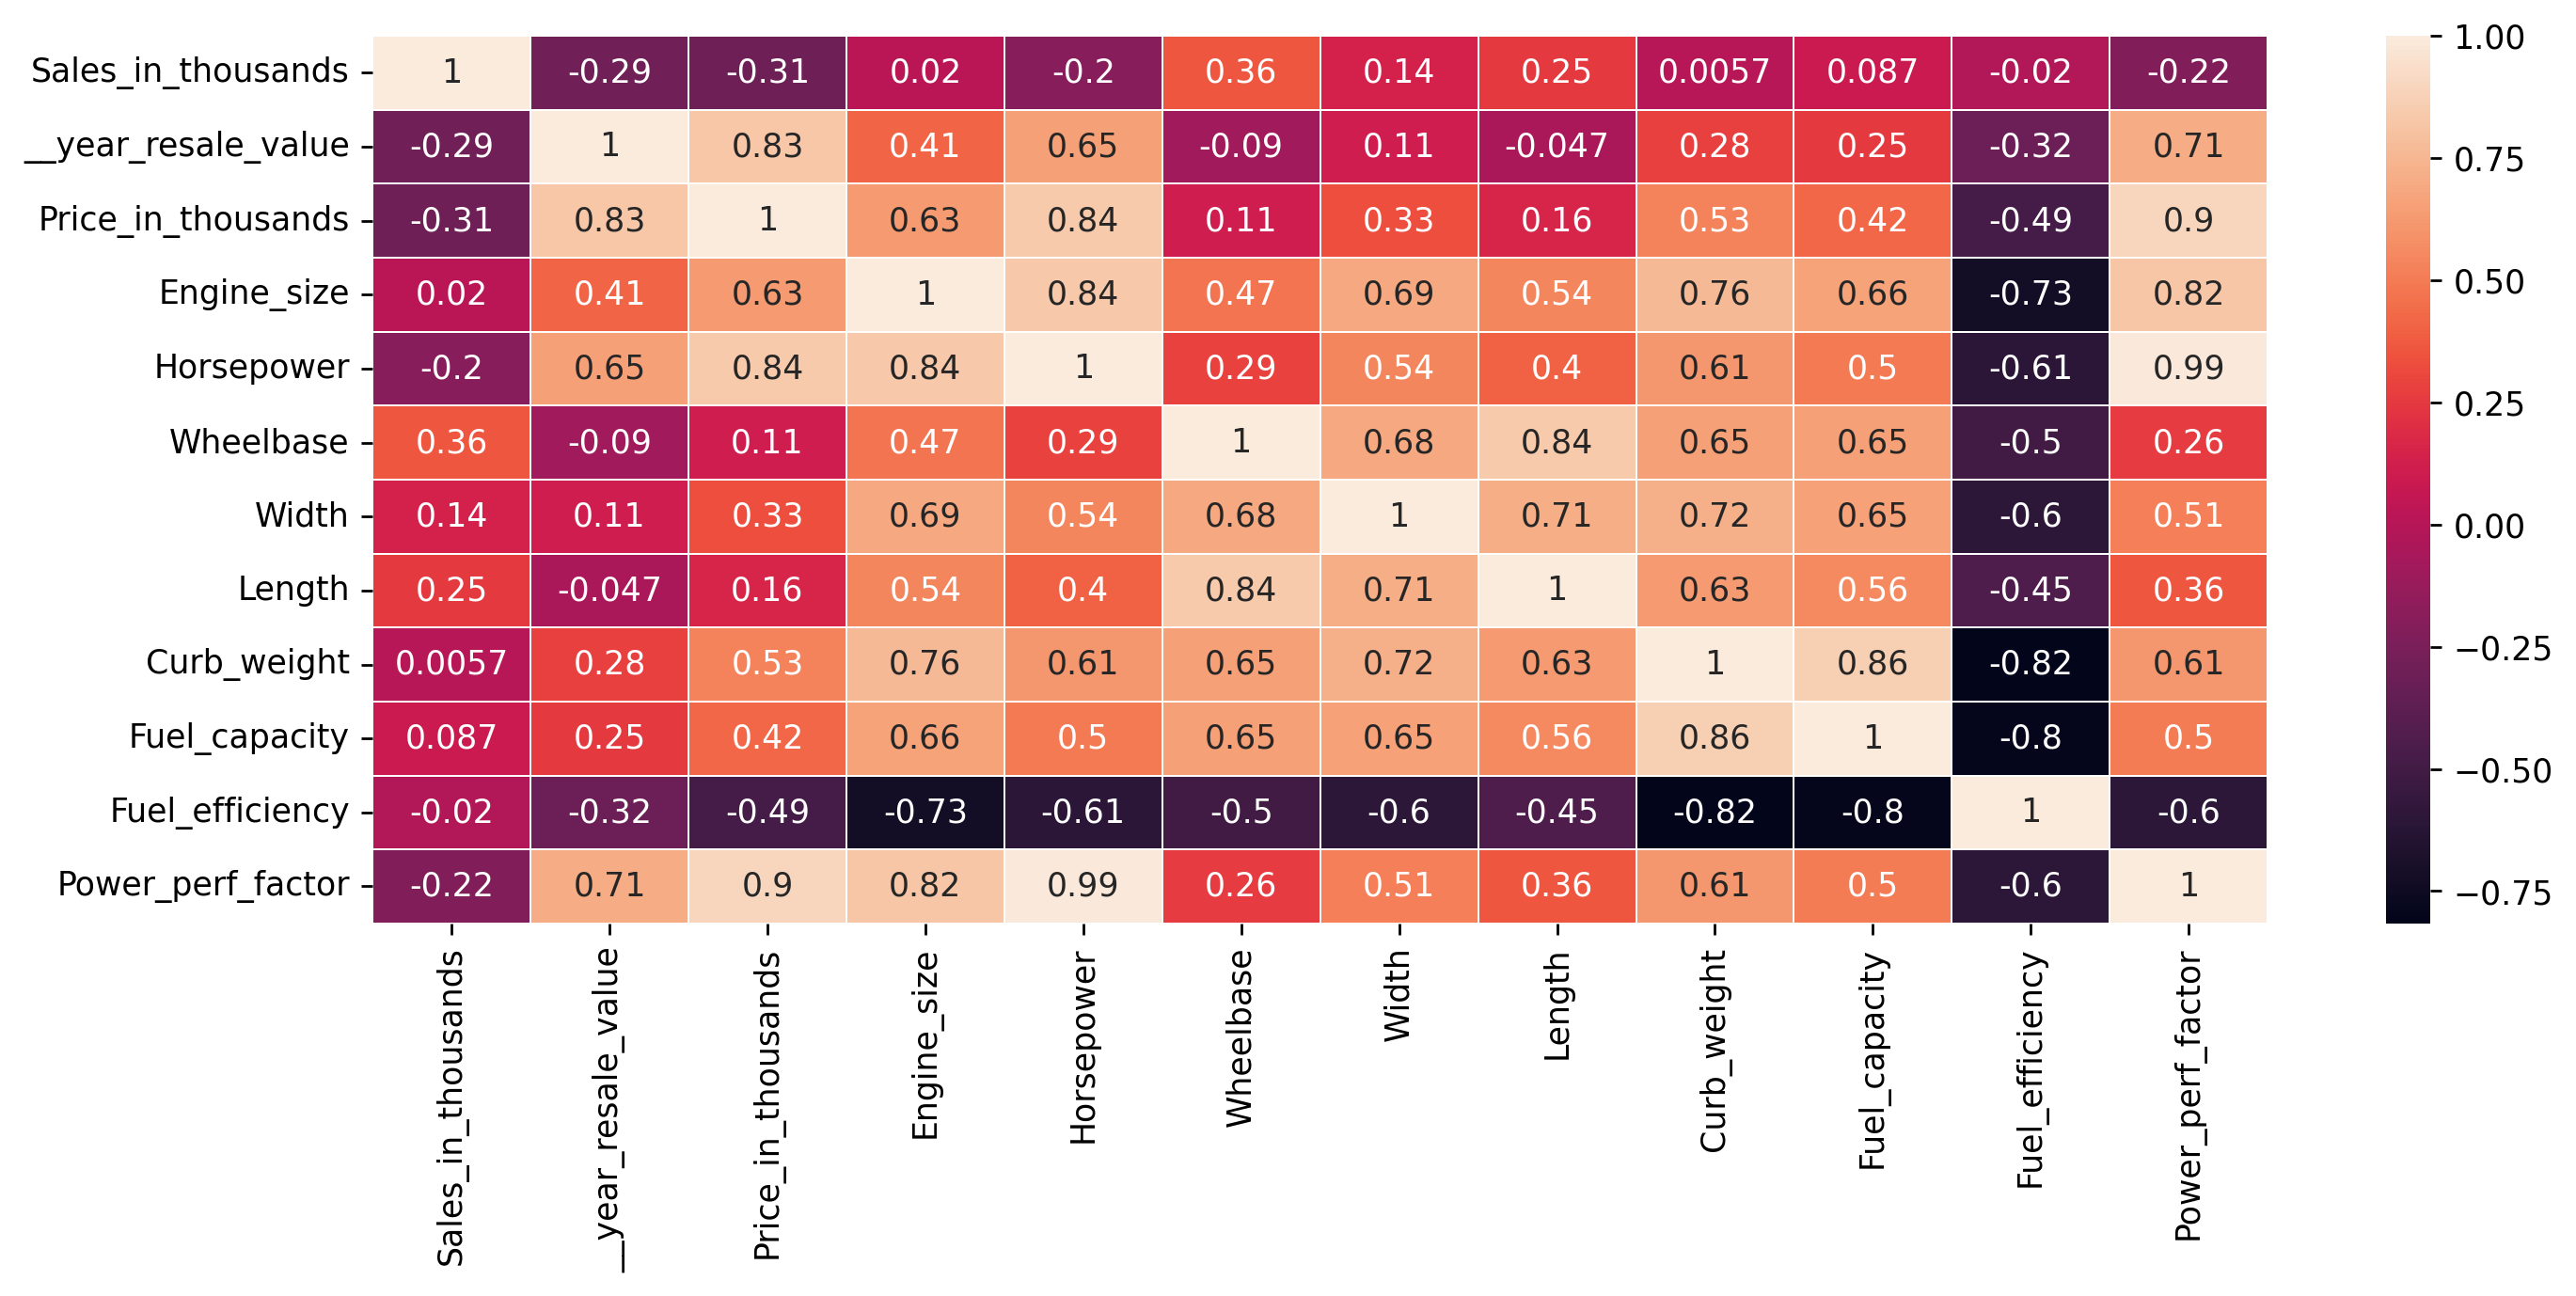

In [9]:
#%% Draw a heatmap to determine the strong and weak correlation between the Price variable and the independent variable
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (13,5)
sns.heatmap(df.corr(), annot =True, linewidths=.5)
plt.show()

In [10]:
# %% Create model
x_list_new = df[['Sales_in_thousands','__year_resale_value','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']]
x = x_list_new
y = df[["Price_in_thousands"]]
x = sms.add_constant(x)
model = sms.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9475.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          3.76e-201
Time:                        02:14:13   Log-Likelihood:                -123.19
No. Observations:                 157   AIC:                             270.4
Df Residuals:                     145   BIC:                             307.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1901    

In [11]:
# %% Split train/test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [12]:
# %% Model 1
x_list_new = x_list_new.drop(["__year_resale_value"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8555.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          5.05e-178
Time:                        02:14:13   Log-Likelihood:                -117.85
No. Observations:                 141   AIC:                             257.7
Df Residuals:                     130   BIC:                             290.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3799      1

In [13]:
# %% Model 2
x_list_new = x_list_new.drop(["Fuel_capacity"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          1.47e-181
Time:                        02:14:13   Log-Likelihood:                -117.81
No. Observations:                 141   AIC:                             255.6
Df Residuals:                     131   BIC:                             285.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4170      1

In [14]:
# %% Model 3
x_list_new = x_list_new.drop(["Sales_in_thousands"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.460e+18
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:14:13   Log-Likelihood:                 2269.8
No. Observations:                 141   AIC:                            -4522.
Df Residuals:                     132   BIC:                            -4495.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.503e-09   6.78e-0

In [15]:
# %% Model 4
x_list_new = x_list_new.drop(["Length"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.253e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          3.53e-184
Time:                        02:14:13   Log-Likelihood:                -117.83
No. Observations:                 141   AIC:                             251.7
Df Residuals:                     133   BIC:                             275.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1969      1.51

In [16]:
# %% Model 5
x_list_new = x_list_new.drop(["Wheelbase"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.532e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          1.97e-187
Time:                        02:14:13   Log-Likelihood:                -117.91
No. Observations:                 141   AIC:                             249.8
Df Residuals:                     134   BIC:                             270.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1304      1.53

In [17]:
# %% Model 6
x_list_new = x_list_new.drop(["Width"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.996e+18
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:14:13   Log-Likelihood:                 2253.8
No. Observations:                 141   AIC:                            -4496.
Df Residuals:                     135   BIC:                            -4478.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.283e-08   4.77e-0

In [18]:
# %% Model 7
x_list_new = x_list_new.drop(["Curb_weight"], axis = 1)
x1 = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.322e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          1.13e-191
Time:                        02:14:13   Log-Likelihood:                -118.97
No. Observations:                 141   AIC:                             247.9
Df Residuals:                     136   BIC:                             262.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5294      0.59

In [19]:
#%% Model 8
x_list_new = x_list_new.drop(["Fuel_efficiency"], axis = 1)
# x1 = x_list_new
x1  = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.689e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):          1.51e-189
Time:                        02:14:13   Log-Likelihood:                -119.18
No. Observations:                 141   AIC:                             246.4
Df Residuals:                     137   BIC:                             258.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1327      0.18

In [20]:
#%% Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values,i) for i in range (len(x1.columns))]
print(vif_data)

             feature        VIF
0              const  14.100151
1        Engine_size   3.455221
2         Horsepower  80.604595
3  Power_perf_factor  73.144607


In [21]:
x_list_new = x_list_new.drop(["Horsepower"], axis = 1)
# x1 = x_list_new
x1  = x_list_new
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     359.5
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.88e-55
Time:                        02:14:13   Log-Likelihood:                -446.95
No. Observations:                 141   AIC:                             899.9
Df Residuals:                     138   BIC:                             908.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.7694      1.61

In [22]:
#%% Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values,i) for i in range (len(x1.columns))]
print(vif_data)

             feature        VIF
0              const  11.093502
1        Engine_size   3.019280
2  Power_perf_factor   3.019280


In [23]:
x1  = df[['Horsepower', 'Engine_size']]
y1 = df[["Price_in_thousands"]]
# x1, y1 = np.array(x1), np.array(y1)
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_train, x_train)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     175.0
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.40e-38
Time:                        02:14:13   Log-Likelihood:                -490.06
No. Observations:                 141   AIC:                             986.1
Df Residuals:                     138   BIC:                             995.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -11.7039      2.262     -5.175      

In [24]:
#%% Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values,i) for i in range (len(x1.columns))]
print(vif_data)

       feature        VIF
0        const  11.973957
1   Horsepower   3.327215
2  Engine_size   3.327215


In [25]:
#%% Testing the model with the test dataset
x1  = df[['Engine_size', 'Power_perf_factor']]
y1 = df[["Price_in_thousands"]]
x1 = sms.add_constant(x1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.1)
new_model = sms.OLS(y_test, x_test)
new_results = new_model.fit()
print(new_results.summary())

                            OLS Regression Results                            
Dep. Variable:     Price_in_thousands   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     43.54
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.73e-06
Time:                        02:14:14   Log-Likelihood:                -31.494
No. Observations:                  16   AIC:                             68.99
Df Residuals:                      13   BIC:                             71.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7206      2.13

In [26]:
#%% - Get results
R_square = new_results.rsquared
params = new_results.params

In [27]:
#%% - Predict
pre_values = params[0] + params[1] * df['Engine_size'] + params[2] * df['Power_perf_factor']

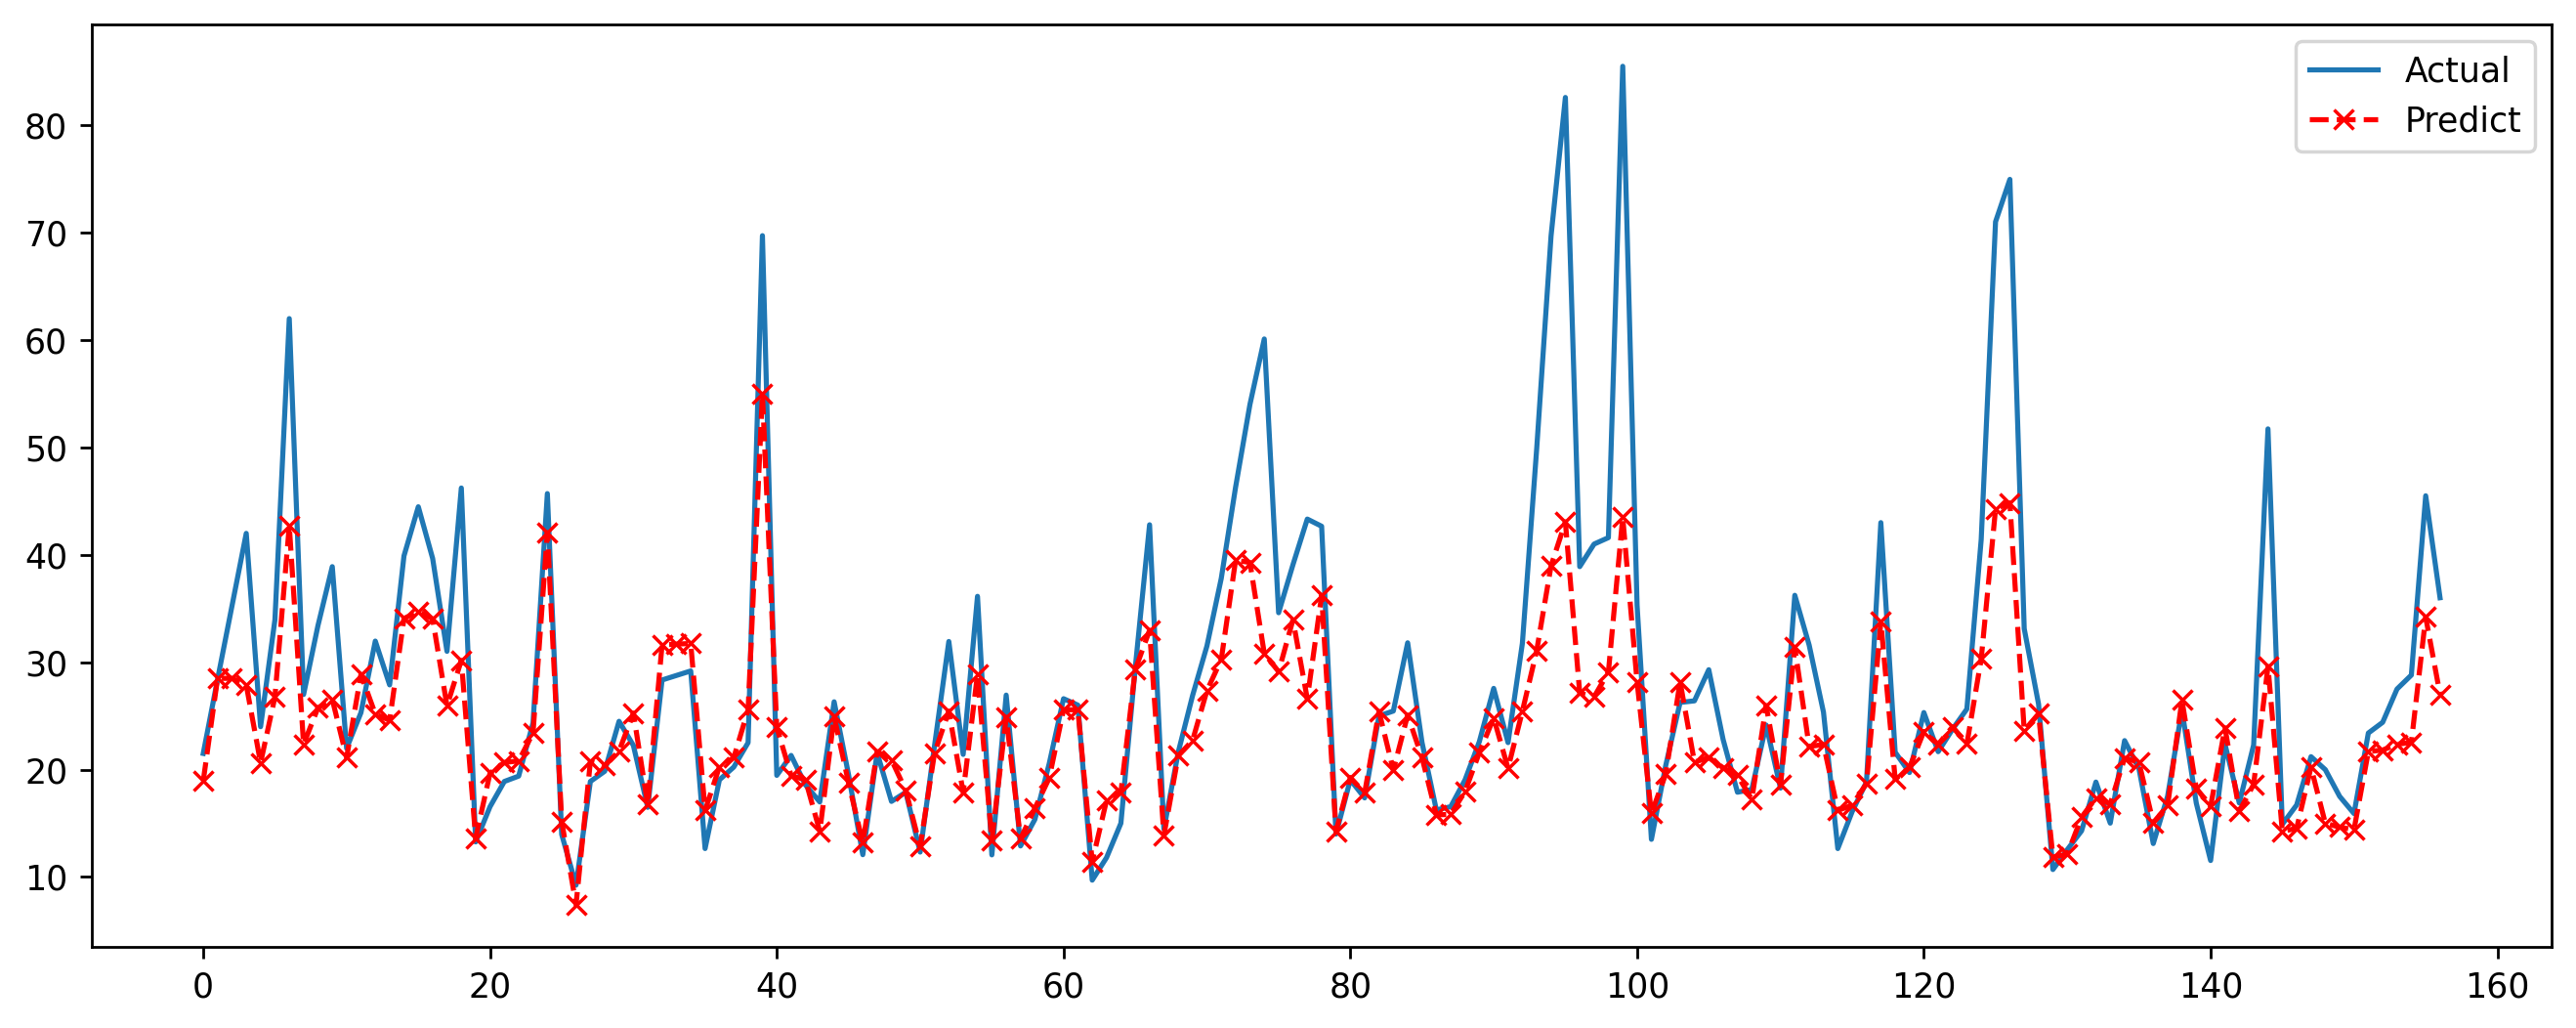

In [28]:
#%% - Visualization
plt.plot(y,label = 'Actual')
plt.plot(pre_values, label = 'Predict', marker = 'x', color = 'red', linestyle = '--')
plt.legend()
plt.show()

In [29]:
#%%
other_x = np.array([[4.2, 200], [4.8, 150]])
other_x = sms.add_constant(other_x)
pre_future_values = new_results.predict(other_x)
print(pre_future_values)

[67.28795869 47.2473735 ]
